In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
from pathlib import Path
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import TMalignModel


def _process(args):
    alignments = SeqIO.index('../data/train/scop40_structural_alignment.fasta', 'fasta')
    for a in args:
        try:
            TMalignModel().generate_protein_model(a[0], a[1], alignments, a[3], a[4])
        except Exception as e:
            print(e)


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ProcessPoolExecutor() as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _, None, f'../data/train/pdbstyle-1.75/{_[2:4]}', f'../data/evaluation/tmalign/{query}')
                for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 15min

  0%|          | 0/35 [00:00<?, ?it/s]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 51%|█████▏    | 18/35 [00:56<01:03,  3.76s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 54%|█████▍    | 19/35 [01:03<01:16,  4.80s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 74%|███████▍  | 26/35 [02:11<01:15,  8.35s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
/home/makigaki/.local/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:200: PDBConstructionWarning: Negative occupancy in one or more atoms
  warnings.warn("

In [1]:
from pathlib import Path
import sys
from concurrent.futures import ProcessPoolExecutor, as_completed

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import SWModel


def _process(args):
    aligns = SeqIO.index('../data/train/scop40_structural_alignment.fasta', 'fasta')
    for a in args:
        SWModel(-11, -1).generate_protein_model(a[0], a[1], aligns, a[3], a[4])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ProcessPoolExecutor() as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _, None, f'../data/train/pdbstyle-1.75/{_[2:4]}',
                 f'../data/evaluation/sw_open11_ext1/{query}') for _ in domains]
        futures.append(executor.submit(_process, args))
    [_ for _ in tqdm(as_completed(futures), total=len(futures))]

  0%|          | 0/35 [00:00<?, ?it/s]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 51%|█████▏    | 18/35 [00:54<00:57,  3.41s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 57%|█████▋    | 20/35 [01:21<02:16,  9.09s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 69%|██████▊   | 24/35 [01:51<01:13,  6.68s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/SeqIO/PdbIO.py:70: BiopythonParserWarning: Ignoring out-of-order residues after a gap
  BiopythonParserWarning)
 74%|███████▍  | 26/35 [02:12<01:14,  8.29s/it]/home/makigaki/.local/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:200: PDBConstructionWarning: Negative o

## {PSI,DELTA}-BLAST

In [3]:
from pathlib import Path
import sys

import numpy as np
from tqdm import tqdm_notebook as tqdm
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid in scop40]
    for domain in domains:
        BLASTModel('psiblast', '/data/DB/blastdb').generate_pairwise_alignment(
            query, domain, '../data/evaluation/psiblast', '../data/train/pssm')  # 1min

In [1]:
from pathlib import Path
import sys

import numpy as np
from tqdm import tqdm_notebook as tqdm
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid in scop40]
    for domain in domains:
        BLASTModel('deltablast', '/data/DB/blastdb').generate_pairwise_alignment(
            query, domain, '../data/evaluation/deltablast', '../data/train/pssm') # 15min

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import sys
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


def _process(args):
    for a in args:
        if Path(f'../data/evaluation/psiblast/{a[0]}/{a[1]}.pdb').exists():
            continue
        try:
            BLASTModel('psiblast', '/data/DB/blastdb').generate_protein_model(a[0], a[1], a[2], a[3], a[4])
        except Exception as e:
            print(e)
            print(a)


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _,
                 f'../data/evaluation/psiblast/{query}/{_}.xml',
                 f'../data/evaluation/psiblast/{query}',
                 f'../data/train/pdbstyle-1.75/{_[2:4]}') for _ in domains]
        _process(args)
#         futures.append(executor.submit(_process, args))
#     [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 8 min

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import sys
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import BLASTModel


def _process(args):
    for a in args:
        if Path(f'../data/evaluation/deltablast/{a[0]}/{a[1]}.pdb').exists():
            continue
        try:
            BLASTModel('deltablast', '/data/DB/blastdb').generate_protein_model(a[0], a[1], a[2], a[3], a[4])
        except Exception as e:
            print(e)
            print(a)


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    futures = []
    for query in test_domain:
        domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px')
                   if _.sid in scop40 and _.sid != query]
        args = [(query, _,
                 f'../data/evaluation/deltablast/{query}/{_}.xml',
                 f'../data/evaluation/deltablast/{query}',
                 f'../data/train/pdbstyle-1.75/{_[2:4]}') for _ in domains]
        _process(args)
#         futures.append(executor.submit(_process, args))
#     [_ for _ in tqdm(as_completed(futures), total=len(futures))] # 9 min

## HHsearch

In [1]:
from pathlib import Path
import sys

import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO
from tqdm import tqdm_notebook as tqdm

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import HHSearchModel


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    for domain in domains:
        HHSearchModel('/data/DB/hhsuitedb').generate_pairwise_alignment(
            query, domain, scop40[query], f'../data/evaluation/hhsearch/{query}') # 3min

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import sys

from tqdm import tqdm_notebook as tqdm
import numpy as np
from Bio.SCOP import Scop
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.generate_models import HHSearchModel


def _process(args):
    for a in args:
        if Path(f'../data/evaluation/hhsearch/{a[0]}/{a[1]}.pdb').exists():
            continue
        HHSearchModel('/data/DB/hhsuitedb').generate_protein_model(a[0], a[1], a[2], a[3])


scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')
for query in tqdm(test_domain):
    domains = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    args = [(query, _, f'../data/evaluation/hhsearch/{query}', f'../data/evaluation/hhsearch/pdbstyle-1.75/{_[2:4]}') for _ in domains]
    _process(args)  # 10 min

# Summary

,PSI-BLAST,DELTA-BLAST,HHsearch,Smith- Waterman,Proposed,Structural alignment
count,718.000000,731.000000,212.000000,909.000000,909.000000,909.000000
mean,0.264724,0.300328,0.405068,0.434181,0.491347,0.551146
std,0.250664,0.274823,0.225753,0.192119,0.183442,0.196818
min,0.021330,0.021270,0.021340,0.087290,0.095850,0.099470
25%,0.075725,0.077900,0.272662,0.294360,0.336820,0.362080
50%,0.143515,0.168650,0.377450,0.370140,0.446080,0.532100
75%,0.445175,0.583940,0.508495,0.569480,0.641870,0.741430
max,0.924610,0.901870,0.871460,0.934810,0.934810,0.944050


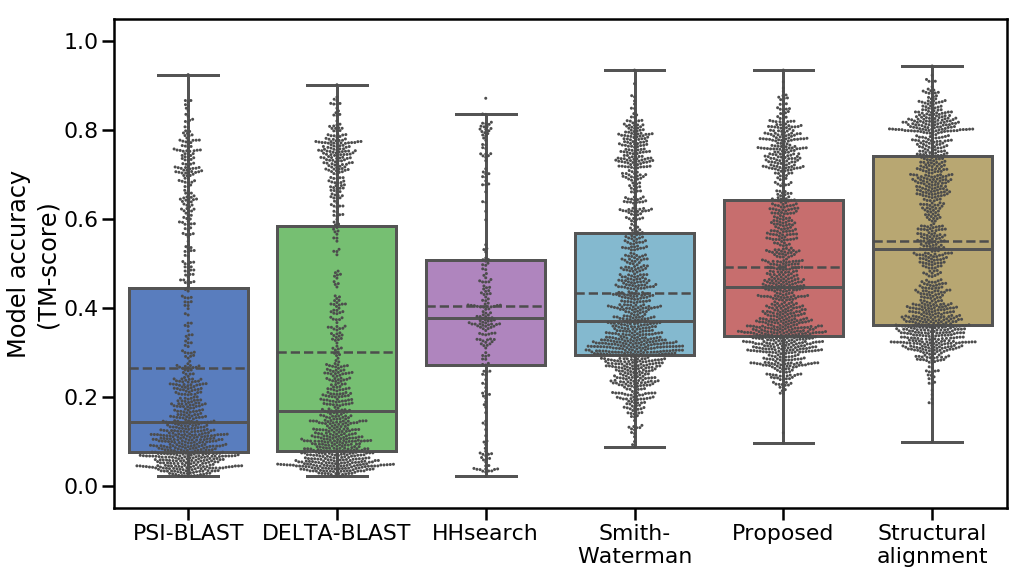

In [6]:
%matplotlib inline

from datetime import datetime
from pathlib import Path
import sys

from Bio.SCOP import Scop
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot
import seaborn
import pandas
import numpy as np
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.TMtoolsCommandLine import TMalignCommandLine

pal = seaborn.color_palette([
    (0.2823529411764706, 0.47058823529411764, 0.8117647058823529), # PSI-BLAST
    (0.41568627450980394, 0.8, 0.396078431372549), # DELTA-BLAST
    (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), # HHsearch
    (0.4666666666666667, 0.7450980392156863, 0.8588235294117647), # SW
    (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Proposed
    (0.7686274509803922, 0.6784313725490196, 0.4), # TM-align
])
scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')

result_d = {}
for query in tqdm(test_domain):
    templates = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
    key = 'PSI-BLAST'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/psiblast/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/psiblast/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'DELTA-BLAST'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/deltablast/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/deltablast/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'HHsearch'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/hhsearch/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/hhsearch/{query}/{template}.pdb',
                                     f'../data/evaluation/hhsearch/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Smith-\nWaterman'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/sw_open11_ext1/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/sw_open11_ext1/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Proposed'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend1e-05/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend1e-05/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
    key = 'Structural\nalignment'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/tmalign/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/tmalign/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])

result_df = pandas.DataFrame.from_dict(result_d, orient='index')
result_df = result_df.transpose()
display(result_df.describe())

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(16, 9))
ax.set_ylabel('Model accuracy\n(TM-score)')
ax.set_ylim(bottom=-0.05, top=1.05)
seaborn.boxplot(data=result_df, ax=ax, showmeans=True, meanline=True, showfliers=False,
                palette=pal, meanprops={'color': '.3', 'linewidth': 2.5},
                flierprops={'markersize': 8, 'marker': 'x', 'markerfacecolor': '.3', 'markeredgewidth': 1.3})
seaborn.swarmplot(data=result_df, ax=ax, color='.3', size=3, linewidth=0)
fig.savefig('boxplot_domain_pairs_tmscore.pdf', bbox_inches='tight', pad_inches = 0)

# Example

* Query: `d1qg3a1`
* Template: `d1va9a1`


Structural 0.88481
------DL-GAPQNPNAKAAGSRKIHFNWLPP-S--G--KPMGYRVKYWIQGD-SESEAHLLDSKV----PSVELTNLYPYCDYEMKVCAYGAQGEGPYSSLVSCRTHQ
ISTEEAAPDGPPMDVTLQPVTSQSIQVTWKAPKKELQNGVIRGYQIGYRENSPGSNGQYSIVEMKATGDSEVYTLDNLKKFAQYGVVVQAFNRAGTGPSSSEINATTLE
Proposed 0.87136
-------DLGAPQNPNAKAAGSRKIHFNWLPPS-----GKPMGYRVKYWIQGD-SESEAHLLDSKV----PSVELTNLYPYCDYEMKVCAYGAQGEGPYSSLVSCRTHQ
ISTEEAAPDGPPMDVTLQPVTSQSIQVTWKAPKKELQNGVIRGYQIGYRENSPGSNGQYSIVEMKATGDSEVYTLDNLKKFAQYGVVVQAFNRAGTGPSSSEINATTLE
HHsearch 0.81458
-------DLGAPQNPNAKAAGSRKIHFNWLPPS-----GKPMGYRVKYWIQGDSESEA-----HLLDSKVPSVELTNLYPYCDYEMKVCAYGAQGEGPYSSLVSCRTHQ
ISTEEAAPDGPPMDVTLQPVTSQSIQVTWKAPKKELQNGVIRGYQIGYRENSPGSNGQYSIVEMKATGDSEVYTLDNLKKFAQYGVVVQAFNRAGTGPSSSEINATTLE


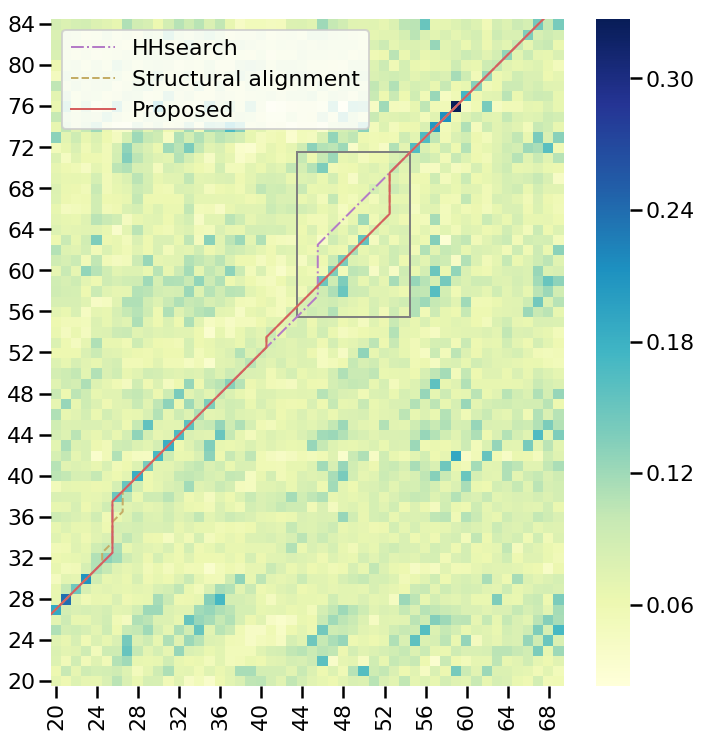

In [64]:
%matplotlib inline

from pathlib import Path

import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.AlignIO import MultipleSeqAlignment
from matplotlib import pyplot
import seaborn

import sys
sys.path.append(Path().resolve().parent.as_posix())
from machina.TMtoolsCommandLine import TMalignCommandLine


pal = [
    (0.2823529411764706, 0.47058823529411764, 0.8117647058823529), # PSI
    (0.41568627450980394, 0.8, 0.396078431372549), # DELTA
    (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), # HH
    (0.4666666666666667, 0.7450980392156863, 0.8588235294117647), # SW
    (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Pro
    (0.7686274509803922, 0.6784313725490196, 0.4), # TM
]


def alignment_graph(alignment):
    assert len(alignment[0]) == len(alignment[1])
    x, y = [0], [0]
    for i in range(len(alignment[0])):
        if alignment[0][i] == '-':
            x.append(x[-1])
            y.append(y[-1] + 1)
        elif alignment[1][i] == '-':
            x.append(x[-1] + 1)
            y.append(y[-1])
        else:
            x.append(x[-1] + 1)
            y.append(y[-1] + 1)
    return np.array(x), np.array(y)


struct_aln = MultipleSeqAlignment(list(SeqIO.parse('../data/evaluation/tmalign/d1qg3a1/d1va9a1.pir', 'pir')))
struct_score = TMalignCommandLine(f'../data/evaluation/tmalign/d1qg3a1/d1va9a1.pdb', f'../data/train/pdbstyle-1.75/qg/d1qg3a1.ent')
struct_score.run()
print(f"Structural {struct_score.tmscore[0]}")
print(struct_aln[0].seq)
print(struct_aln[1].seq)
machina_aln = np.load('../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend1e-05/d1qg3a1/d1va9a1.npy')
machina_aln = MultipleSeqAlignment([
    SeqRecord(Seq(machina_aln[0][0]), id='d1qg3a1'),
    SeqRecord(Seq(machina_aln[0][1]), id='d1va9a1')
])
machina_score = TMalignCommandLine(
    f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend1e-05/d1qg3a1/d1va9a1.pdb',
    f'../data/train/pdbstyle-1.75/qg/d1qg3a1.ent')
machina_score.run()
print(f"Proposed {machina_score.tmscore[0]}")
print(machina_aln[0].seq)
print(machina_aln[1].seq)
hhsearch_aln = MultipleSeqAlignment(list(SeqIO.parse('../data/evaluation/hhsearch/d1qg3a1/d1va9a1.pir', 'pir')))
hhsearch_aln[0].seq = "-------" + hhsearch_aln[0].seq
hhsearch_aln[1].seq = "ISTEEAA" + hhsearch_aln[1].seq
hhsearch_score = TMalignCommandLine(f'../data/evaluation/hhsearch/d1qg3a1/d1va9a1.pdb', f'../data/train/pdbstyle-1.75/qg/d1qg3a1.ent')
hhsearch_score.run()
print(f"HHsearch {hhsearch_score.tmscore[0]}")
print(hhsearch_aln[0].seq)
print(hhsearch_aln[1].seq)

labels = np.load('../data/prediction/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000/d1qg3a1/d1va9a1.npy')
fig, ax = pyplot.subplots(figsize=(labels.shape[0]/8, labels.shape[1]/8))
seaborn.set_context('poster')
seaborn.heatmap(labels.T, ax=ax, linewidths=0, square=True, rasterized=True, cmap="YlGnBu", cbar_kws={"shrink": 0.9}).invert_yaxis()

x, y = alignment_graph(hhsearch_aln)
ax.plot(x, y, alpha=1, label='HHsearch', linewidth=2, linestyle='dashdot', color=pal[2])

x, y = alignment_graph(struct_aln)
ax.plot(x, y, alpha=1, label='Structural alignment', linewidth=2, linestyle='dashed', color=pal[5])

x, y = alignment_graph(machina_aln)
ax.plot(x, y, alpha=1, label='Proposed', linewidth=2, color=pal[4])

ax.add_patch(pyplot.Rectangle((44, 56), 11, 16, fill=False, color='gray', linewidth=2))

ax.set_xlim(20, 70)
ax.set_ylim(20, 85)
ax.legend(frameon=True)
fig.savefig('alignment_path_d1qg3a1_d1va9a1.pdf', bbox_inches='tight', pad_inches = 0)